# matplotlib可视化练习

In [10]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
mpl.rc('figure', figsize = (14, 7))
# 设置字体 14
mpl.rc('font', size = 14)
# 不显示顶部和右侧的坐标线
mpl.rc('axes.spines', top = False, right = False)
# 不显示网格
mpl.rc('axes', grid = False)
# 设置背景颜色是白色
mpl.rc('axes', facecolor = 'white')

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [12]:
data = sns.load_dataset("flights")
data.head()
#type(data['passengers'])
# 年份，月份，乘客数


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


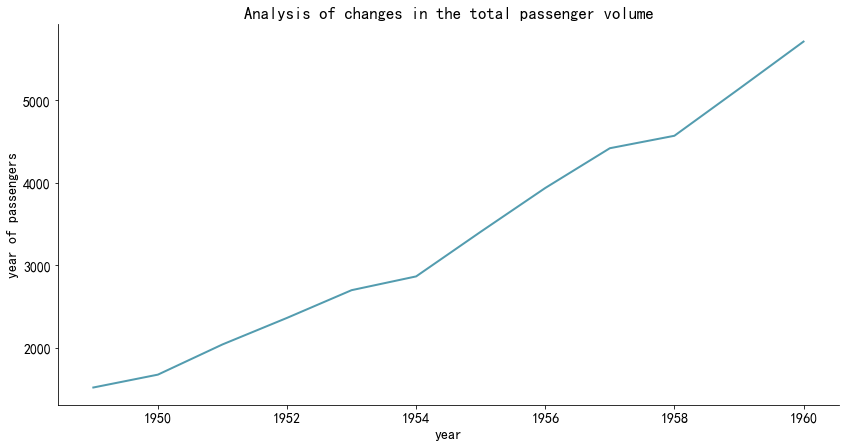

In [13]:
#分析年度乘客总量变化情况（折线图）
#汇总每年的乘客总量
year_total = data[['year','passengers']].groupby('year').agg(np.sum)
# 包装曲线绘制函数
def lineplot(x_data, y_data, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
# 调用绘图函数
lineplot(x_data = year_total.index.values
         , y_data = year_total['passengers']
         , x_label = 'year'
         , y_label = 'year of passengers'
         , title = 'Analysis of changes in the total passenger volume')

<Container object of 12 artists>

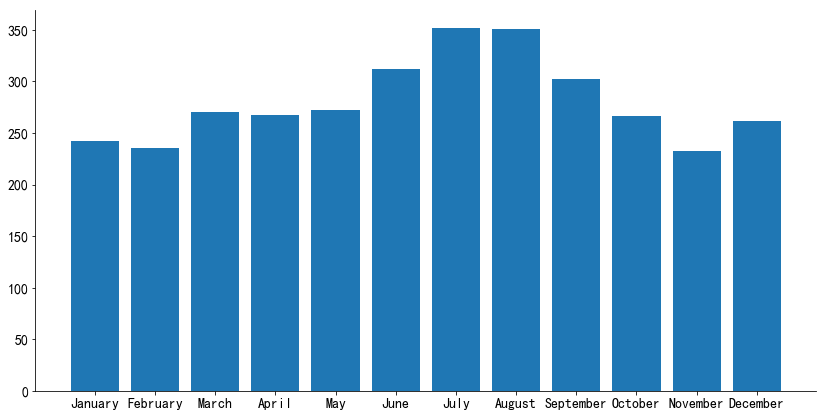

In [14]:
month_data = data.groupby('month').mean()
month_data.reset_index(inplace=True)

plt.xticks(range(1,13),month_data['month']) #该行写在plt.bar()上方较好
plt.bar(range(1,13), month_data['passengers'])

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [15]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
data['sepal_area'] = data['sepal_length']*data['sepal_width']
data['petal_area'] = data['petal_length']*data['petal_width']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


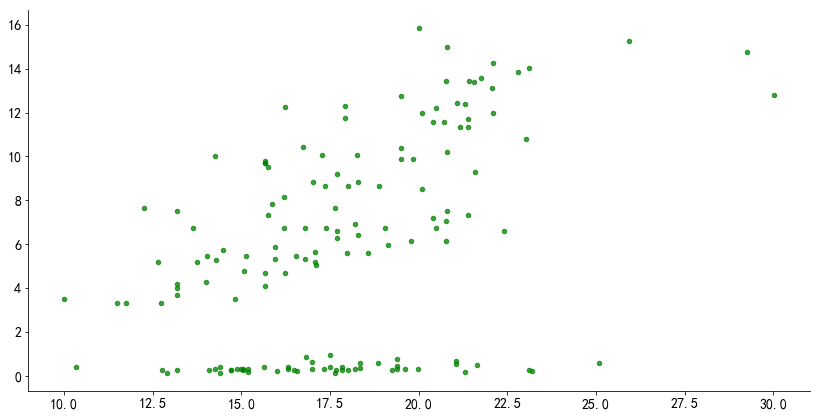

In [17]:
# 萼片（sepal）和花瓣（petal）的大小关系（散点图）
plt.scatter(data['sepal_area'], data['petal_area'], s = 20, color = 'g', alpha = 0.75)

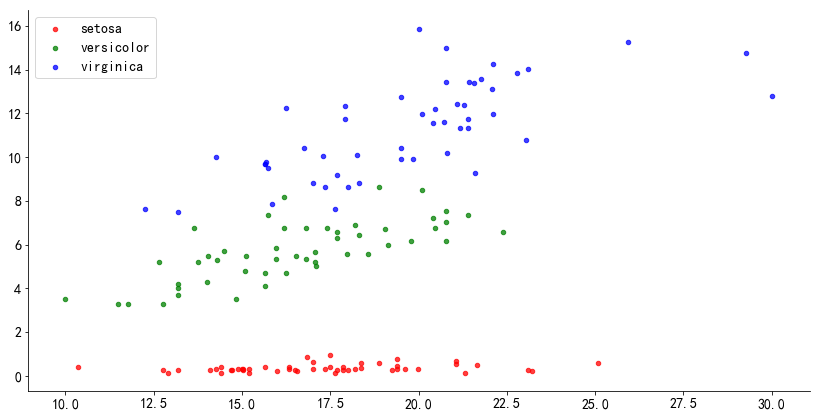

In [18]:
#不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
spe = data['species'].unique()
#scatter_list = {}
colors = ['r','g','b']
j = 0
for i in spe:    
    data_specie = data[data['species'] == i]
    #scatter_list[i] = plt.scatter(data_specie['sepal_area'], data_specie['petal_area'], s = 20, color = colors[j], alpha = 0.75)
    plt.scatter(data_specie['sepal_area'], data_specie['petal_area'], s = 20, color = colors[j], alpha = 0.75)
    j = j+1
plt.legend(spe)
#plt.legend((scatter_list['setosa'], scatter_list['versicolor'], scatter_list['virginica']), (u'setosa', u'versicolor', u'virginica'), loc=2)

In [19]:
#不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


In [20]:
sepal_data = []
petal_data = []
for i in spe:
    sepal_data.append(data[data['species'] == i]['sepal_area'].values)
    petal_data.append(data[data['species'] == i]['petal_area'].values)

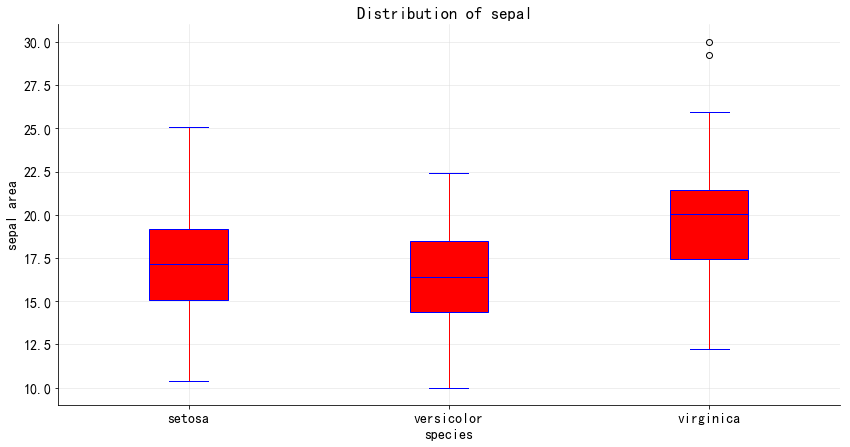

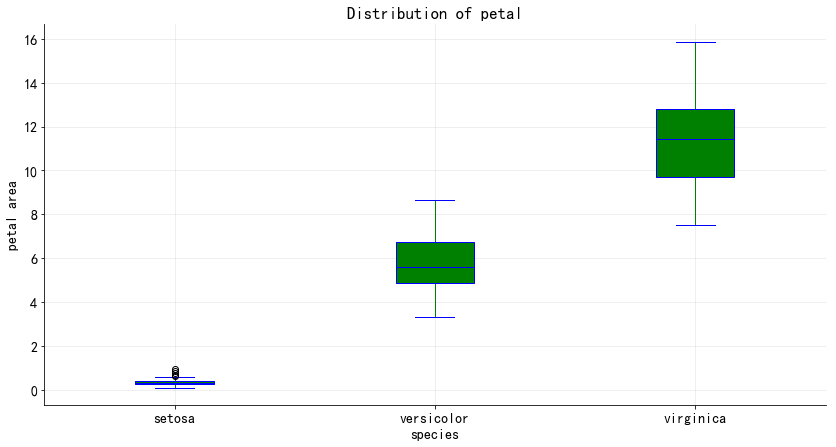

In [21]:
# 定义绘图函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.grid(b = True, color='#dedede', linestyle='-', linewidth=0.5)

# 调用绘图函数
#不同种类鸢尾花萼片的分布情况（箱式图）
boxplot(x_data = spe
        , y_data = sepal_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'species'
        , y_label = 'sepal area'
        , title = 'Distribution of sepal ')

#不同种类鸢尾花花瓣的分布情况（箱式图）
boxplot(x_data = spe
        , y_data = petal_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'species'
        , y_label = 'petal area'
        , title = 'Distribution of petal')

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [22]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


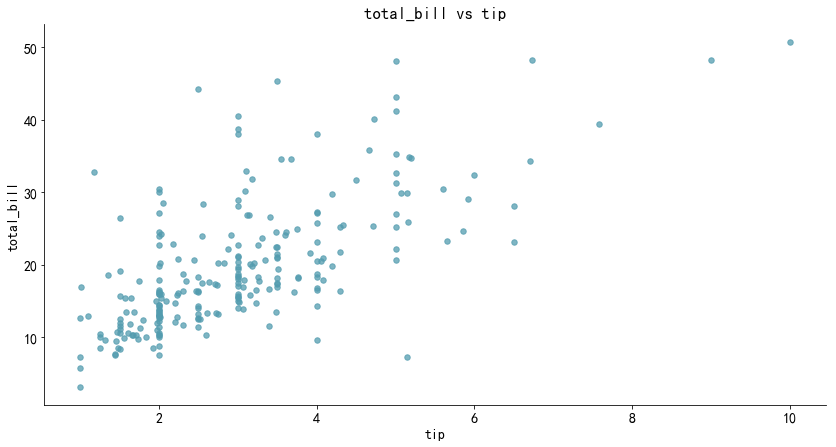

In [23]:
#小费和总消费之间的关系（散点图）
def scatterplot(x_data, y_data, x_label, y_label, title):

    # 创建一个绘图对象
    fig, ax = plt.subplots()

    # 设置数据、点的大小、点的颜色和透明度
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75) 

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    #ax.sp

# 绘制散点图
scatterplot(x_data = data['tip'].values #numpy的数组
            , y_data = data['total_bill'].values
            , x_label = 'tip'
            , y_label = 'total_bill'
            , title = 'total_bill vs tip')

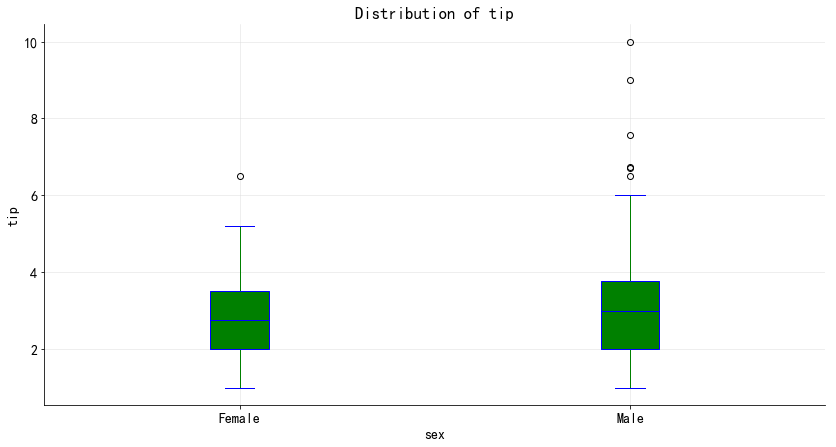

In [24]:
#男性顾客和女性顾客，谁更慷慨（分类箱式图）
sex = data['sex'].unique()  #sex = data['sex'].value_counts().index
sex_data = []
for i in sex:
    sex_data.append(data[data['sex']==i]['tip'])
#sex_data=[data[data['sex']==s]['tip'] for s in sex]
    
    
boxplot(x_data = sex
        , y_data = sex_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'sex'
        , y_label = 'tip'
        , title = 'Distribution of tip')
#结论：男性更慷慨

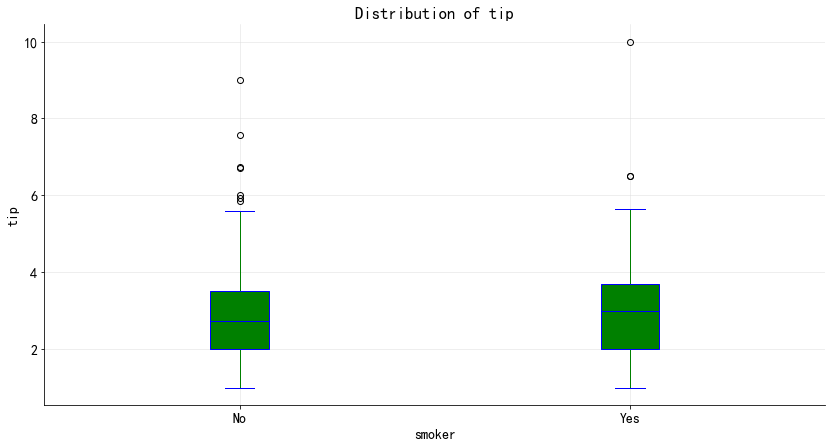

In [25]:
#抽烟与否是否会对小费金额产生影响（分类箱式图）
smoker = data['smoker'].unique()
smoker_data = []
for i in smoker:
    smoker_data.append(data[data['smoker'] == i]['tip'])
boxplot(x_data = smoker
        , y_data = smoker_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'smoker'
        , y_label = 'tip'
        , title = 'Distribution of tip')
#结论：抽烟的人更慷慨    

In [26]:
data['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

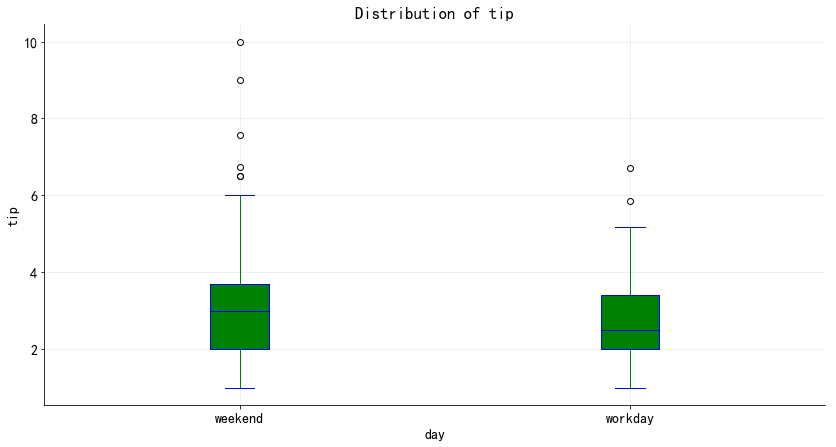

In [27]:
#工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
day_data = [data[data['day'].isin(['Sun','Sat'])]['tip'],data[data['day'].isin(['Thur','Fri'])]['tip']]
boxplot(x_data = ['weekend','workday']
        , y_data = day_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'day'
        , y_label = 'tip'
        , title = 'Distribution of tip')
#结论：周末更慷慨一些

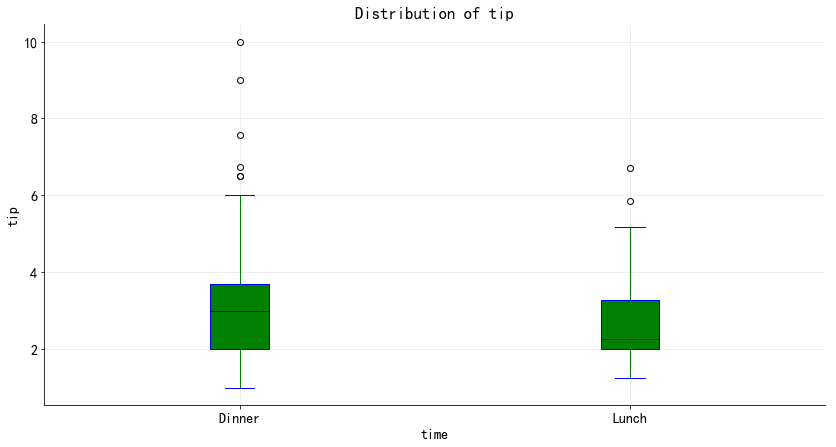

In [28]:
#午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
food_time = data['time'].unique()
time_data = []
for i in food_time:
    time_data.append(data[data['time'] == i]['tip'])
boxplot(x_data = food_time
        , y_data = time_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'time'
        , y_label = 'tip'
        , title = 'Distribution of tip')
#结论：dinner time的客人愿意给消费

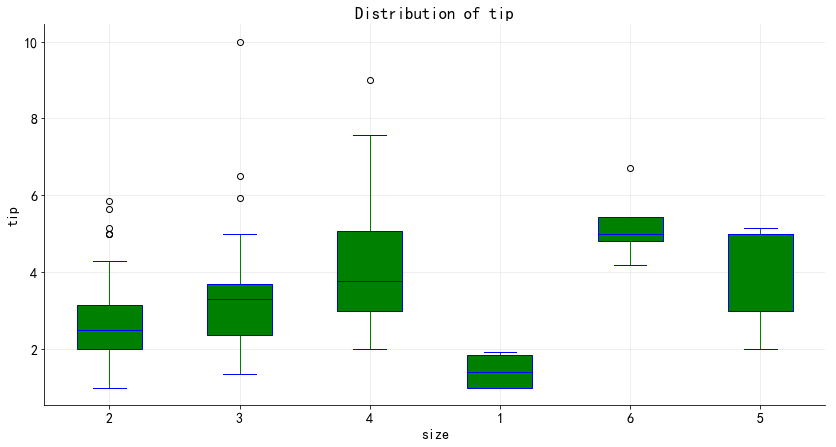

In [29]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
size = data['size'].unique()
size_data = []
for i in size:
    size_data.append(data[data['size']==i]['tip'])
boxplot(x_data = size
        , y_data = size_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'size'
        , y_label = 'tip'
        , title = 'Distribution of tip')
#结论：人数越多，给的消费趋向于越多

In [46]:
size_data[5]

142    5.00
155    5.14
185    5.00
187    2.00
216    3.00
Name: tip, dtype: float64

In [30]:
#性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
group_sex_smoker = data[['sex','smoker','tip']].groupby(['sex','smoker']).mean().unstack()
group_sex_smoker.columns = ['yes','no']
group_sex_smoker.index.values

[Male, Female]
Categories (2, object): [Male, Female]

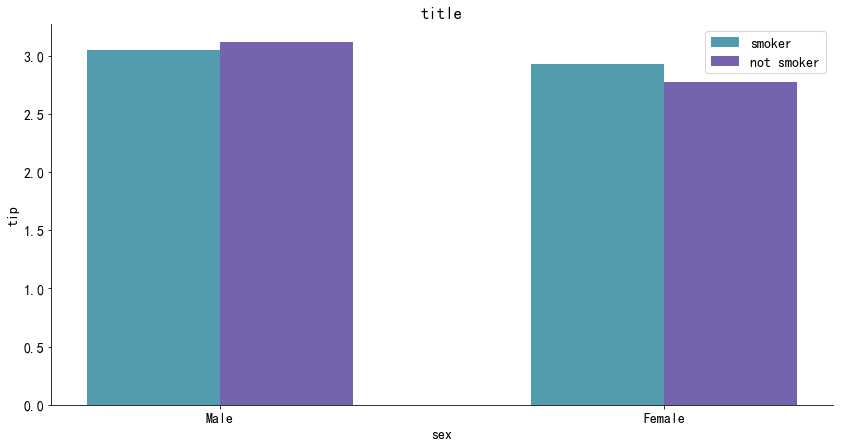

In [31]:
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.6
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')
    ax.set

# 调用绘图函数
groupedbarplot(x_data = range(2)
               , y_data_list = [group_sex_smoker['yes'], group_sex_smoker['no']]
               , y_data_names = ['smoker', 'not smoker']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'tip'
               , title = 'title')
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
ax.set_xticks(range(2))
ax.set_xticklabels(group_sex_smoker.index.values)

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [32]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
pclass = data['pclass'].unique()

In [34]:
pclass_alive = data[['pclass','alive']].groupby(['pclass','alive']).size().unstack()
pclass_alive['total'] = pclass_alive['yes']+pclass_alive['no']
pclass_alive['yes_prop'] = pclass_alive['yes']/pclass_alive['total']
pclass_alive['no_prop'] = pclass_alive['no']/pclass_alive['total']
#pclass_alive.sort_values(by = 'pclass')

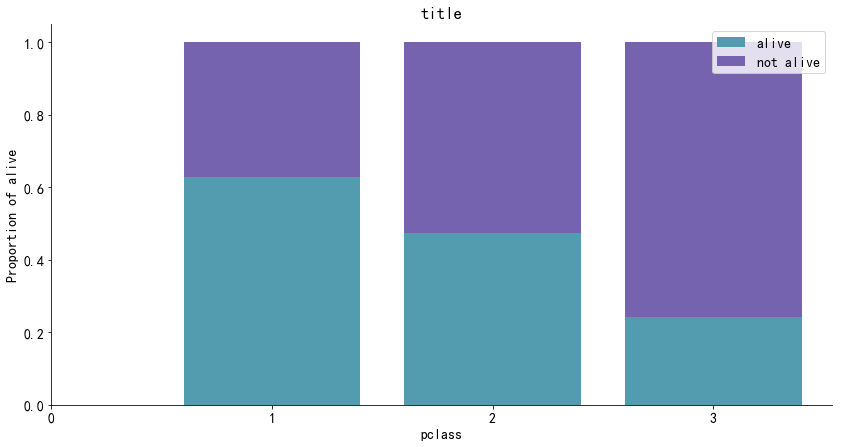

In [35]:
# 绘制堆积柱状图
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

# 调用绘图函数
stackedbarplot(x_data = pclass_alive.index.values
               , y_data_list = [pclass_alive['yes_prop'], pclass_alive['no_prop']]
               , y_data_names = ['alive', 'not alive']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'pclass'
               , y_label = 'Proportion of alive'
               , title = 'title')
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
ax.set_xticks(range(4))


In [36]:
#不同性别的幸存比例（堆积柱状图）
sex_alive = data[['sex','alive']].groupby(['sex','alive']).size().unstack()
sex_alive['total'] = sex_alive['yes']+sex_alive['no']
sex_alive['yes_prop'] = sex_alive['yes']/sex_alive['total']
sex_alive['no_prop'] = sex_alive['no']/sex_alive['total']
#pclass_alive.sort_values(by = 'pclass')
sex_alive

alive,no,yes,total,yes_prop,no_prop
sex,,,,,
female,81,233,314,0.742038,0.257962
male,468,109,577,0.188908,0.811092


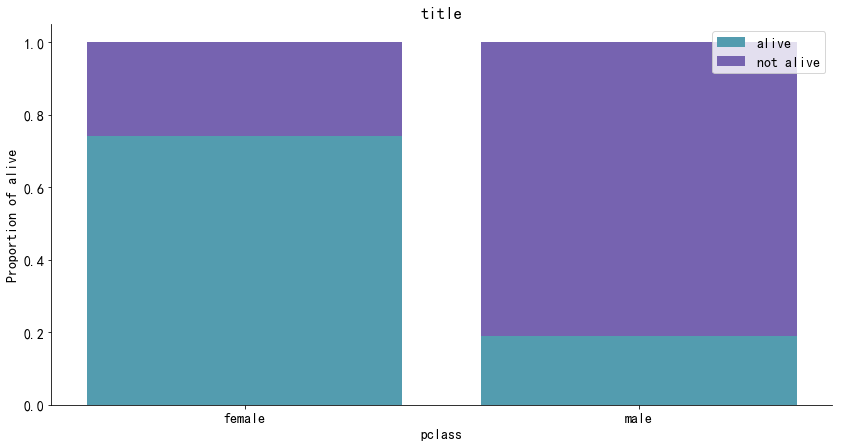

In [37]:
# 调用绘图函数
stackedbarplot(x_data = range(2)
               , y_data_list = [sex_alive['yes_prop'], sex_alive['no_prop']]
               , y_data_names = ['alive', 'not alive']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'pclass'
               , y_label = 'Proportion of alive'
               , title = 'title')
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
ax.set_xticks(range(2))
ax.set_xticklabels(sex_alive.index.values)

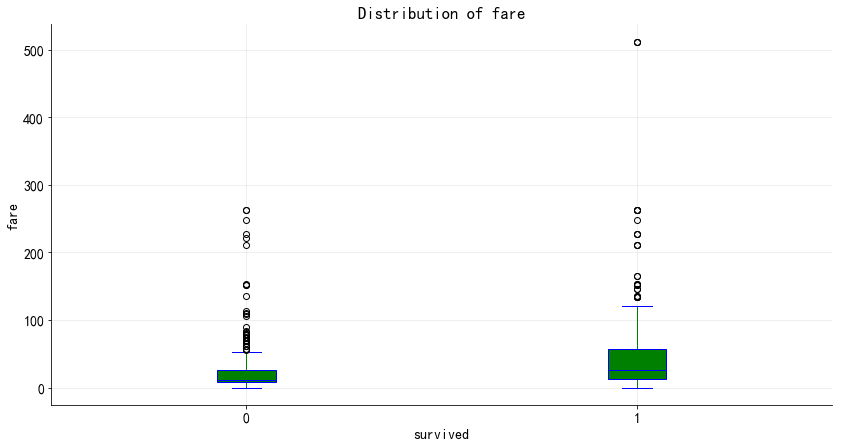

In [38]:
#幸存和遇难乘客的票价分布（分类箱式图）
survived = data['survived'].unique()
fare_data = []
age_data = []
sib_data = []
parch_data = []
for i in survived:
    fare_data.append(data[data['survived'] == i]['fare'])
    age_data.append(data[data['survived'] == i]['age'].dropna())
    sib_data.append(data[data['survived'] == i]['sibsp'])
    parch_data.append(data[data['survived'] == i]['parch'])
boxplot(x_data = survived
        , y_data = fare_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'survived'
        , y_label = 'fare'
        , title = 'Distribution of fare')

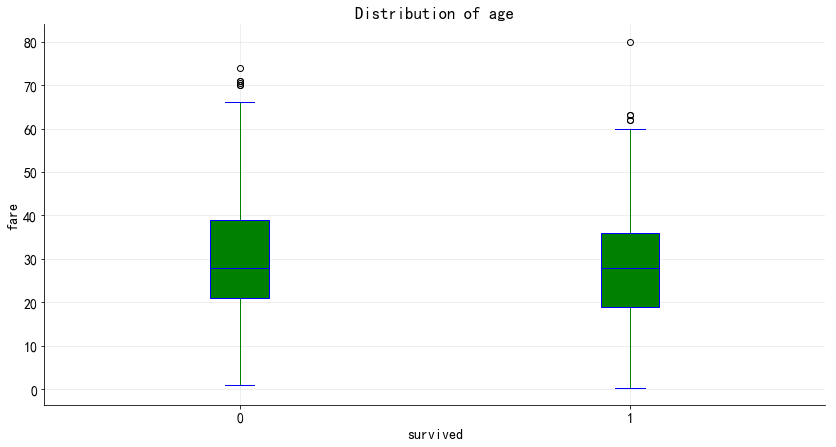

In [39]:
## 幸存和遇难乘客的年龄分布（分类箱式图）
boxplot(x_data = survived
        , y_data = age_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'survived'
        , y_label = 'fare'
        , title = 'Distribution of age')

In [40]:
# 不同上船港口的乘客仓位等级分布（分组柱状图）
embarked_class = data[['embarked','class']].groupby(['embarked','class']).size().unstack()
embarked_class


class,First,Second,Third
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


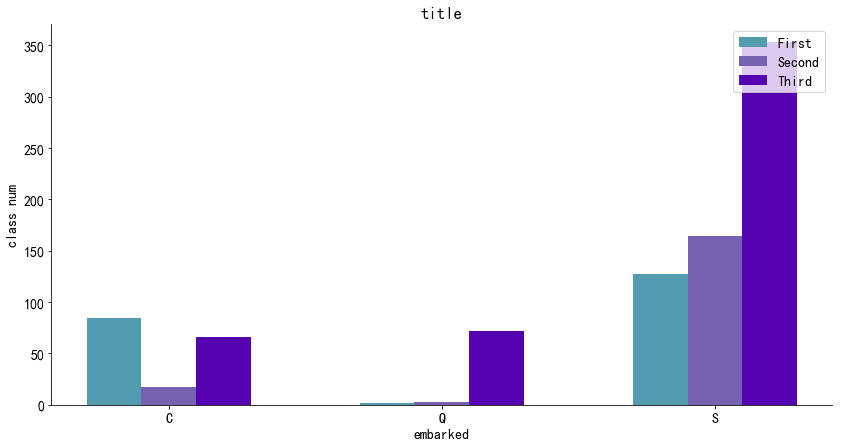

In [41]:
# 调用绘图函数
groupedbarplot(x_data = range(3)
               , y_data_list = [embarked_class['First'], embarked_class['Second'], embarked_class['Third']]
               , y_data_names = ['First', 'Second', 'Third']
               , colors = ['#539caf', '#7663b0','#5503b0']
               , x_label = 'embarked'
               , y_label = 'class num'
               , title = 'title')
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
ax.set_xticks(range(3))
ax.set_xticklabels(embarked_class.index.values)

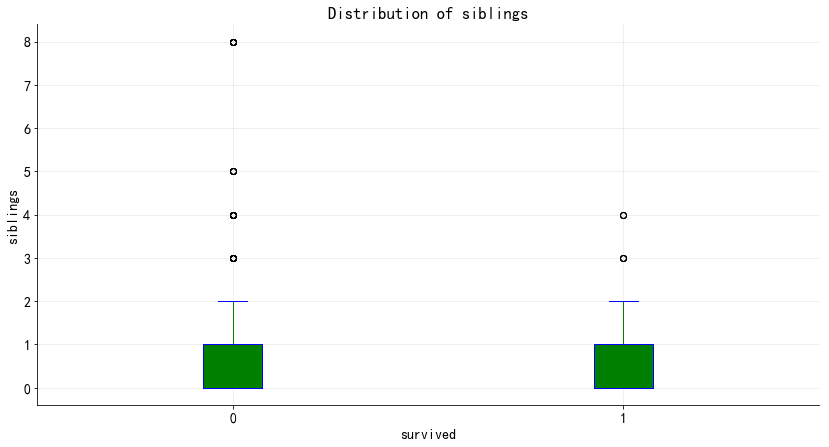

In [42]:
# 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

boxplot(x_data = survived
        , y_data = sib_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'survived'
        , y_label = 'siblings'
        , title = 'Distribution of siblings')

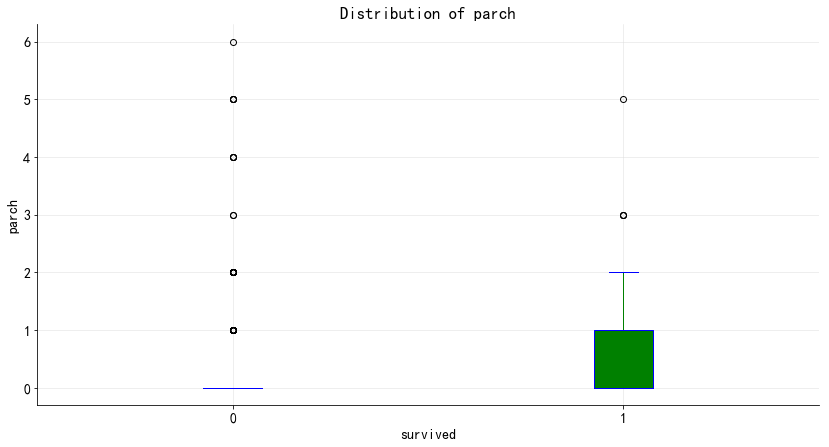

In [43]:
# 幸存和遇难乘客父母子女的数量分布（分类箱式图）
boxplot(x_data = survived
        , y_data = parch_data
        , base_color = 'b'
        , median_color = 'g'
        , x_label = 'survived'
        , y_label = 'parch'
        , title = 'Distribution of parch')

In [44]:
# 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
alive_alone = data[['alone','alive']].groupby(['alone','alive']).size().unstack()
alive_alone

alive,no,yes
alone,,
False,175,179
True,374,163


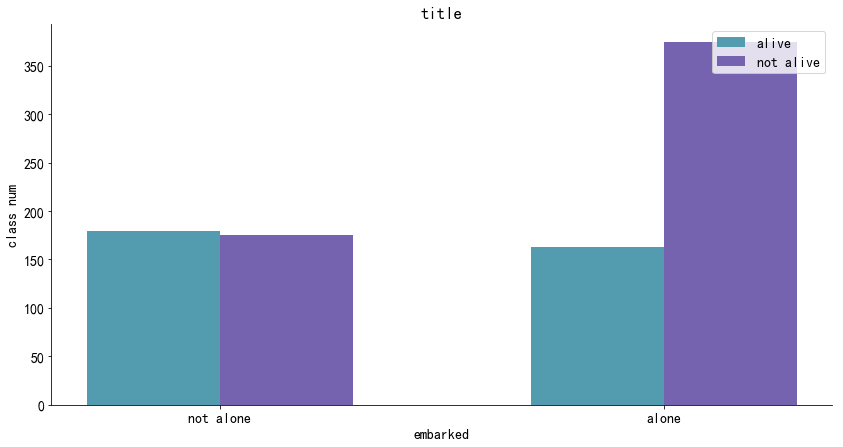

In [45]:
# 调用绘图函数
groupedbarplot(x_data = range(2)
               , y_data_list = [alive_alone['yes'], alive_alone['no']]
               , y_data_names = ['alive', 'not alive']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'embarked'
               , y_label = 'class num'
               , title = 'title')
ax = plt.gca() #Get the current Axes instance on the current figure matching the given keyword args, or create one.
ax.set_xticks(range(2))
ax.set_xticklabels(['not alone','alone'])

从数据上看，单独乘船的乘客没有幸存的比例大